# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


# 1.) US perm Visas csv from cycle using zip extractor


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/Econ 441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [5]:
missing_values = df.isna().sum()
missing_values.sort_values(ascending=True, inplace=True)
missing_values[:25]

decision_date                       0
case_status                         0
employer_name                      12
employer_city                      14
employer_postal_code               37
employer_address_1                 42
employer_state                     42
job_info_work_city                102
job_info_work_state               103
pw_soc_code                       397
pw_unit_of_pay_9089              1572
pw_source_name_9089              2099
pw_amount_9089                   2216
pw_soc_title                     2336
country_of_citizenship          20633
class_of_admission              22845
pw_level_9089                   27627
wage_offer_from_9089           114771
wage_offer_unit_of_pay_9089    115916
case_number                    135269
case_received_date             135271
job_info_combo_occupation      135279
job_info_experience            135281
ji_live_in_domestic_service    135282
job_info_education             135282
dtype: int64

In [6]:
df['pw_unit_of_pay_9089'].nunique()

10

In [7]:
df_select = df[["case_status", "class_of_admission", 'pw_unit_of_pay_9089', "employer_state", "job_info_education"]]

# 3.) Clean your data for a decision tree


In [8]:
df_select = df_select.dropna()

In [9]:
X = pd.get_dummies(df_select[["class_of_admission", "pw_unit_of_pay_9089", "employer_state", "job_info_education"]])
y = df_select["case_status"]

# 4.) Fit and plot a decision tree of depth 3


In [10]:
from sklearn import tree

In [11]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'employer_state_TEXAS <= 0.5\ngini = 0.571\nsamples = 222222\nvalue = [113060, 90605, 10004, 8553]\nclass = Certified'),
 Text(0.25, 0.625, 'job_info_education_None <= 0.5\ngini = 0.569\nsamples = 208649\nvalue = [107845, 83429, 9227, 8148]\nclass = Certified'),
 Text(0.125, 0.375, 'employer_state_CALIFORNIA <= 0.5\ngini = 0.562\nsamples = 195242\nvalue = [101470, 79386, 7313, 7073]\nclass = Certified'),
 Text(0.0625, 0.125, 'gini = 0.558\nsamples = 174556\nvalue = [92318, 69808, 6444, 5986]\nclass = Certified'),
 Text(0.1875, 0.125, 'gini = 0.585\nsamples = 20686\nvalue = [9152, 9578, 869, 1087]\nclass = Certified-Expired'),
 Text(0.375, 0.375, 'employer_state_NC <= 0.5\ngini = 0.656\nsamples = 13407\nvalue = [6375, 4043, 1914, 1075]\nclass = Certified'),
 Text(0.3125, 0.125, 'gini = 0.646\nsamples = 12100\nvalue = [5979, 3491, 1767, 863]\nclass = Certified'),
 Text(0.4375, 0.125, 'gini = 0.691\nsamples = 1307\nvalue = [396, 552, 147, 212]\nclass = Certified-Expired'

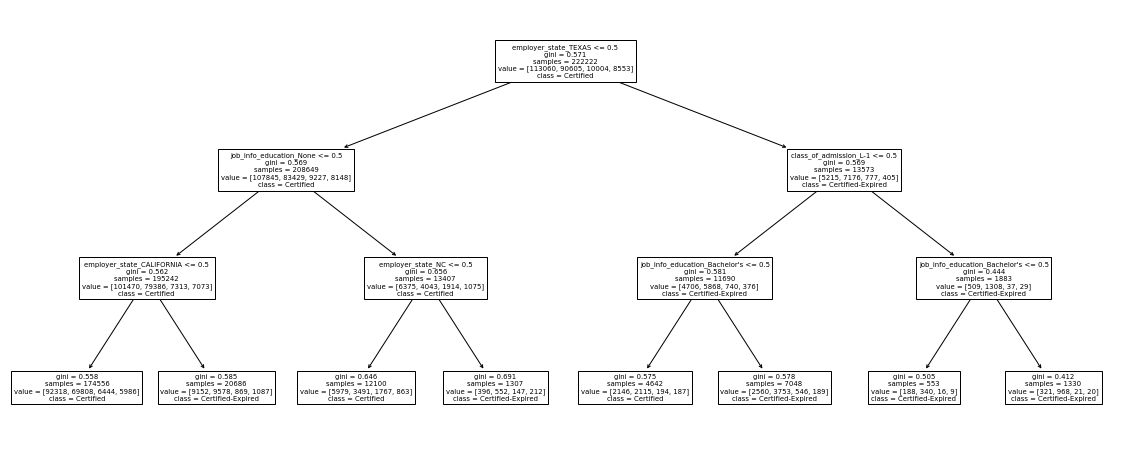

In [12]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf, feature_names = X.columns, class_names = clf.classes_)

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node is the first one on the left.  With a sample size of 174556, this is the largest leaf node in the tree by sample size. value = [92318, 69808, 6444, 5986] is the number of samples for each class present in the node. The node has the largest sample size among all leaf nodes and is primarily composed of samples belonging to the "Certified" class.The largest leaf node in the decision tree has a relatively high gini index, indicating that there is still a considerable amount of impurity in the node. 

From the node we can learn that a person that is not employed in Texas or California, and does not have no education is predicted to be certified. If they are not certified, one of the reason could be because they are working in California.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

max_depths = [1, 2, 3, 4, 5]
outputs = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=441) # Train test split


for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  oos_accuracy =  accuracy_score(y_test, y_pred) #Calculate out of sample acuracy
  outputs.append(oos_accuracy)

In [14]:
outputs

[0.5194474027629862,
 0.5194474027629862,
 0.5219223903880481,
 0.5235273823630882,
 0.5252973735131324]

Therefore, the best max_depth is 5.